2025994 Teoría de la Información y Sistemas de Comunicaciones

Por: Santiago Barrera Berrio, Daniel Felipe Montenegro Herrera

# Análisis en Tiempo Real de Voz con la transformada de Fourier y Espectro de Frecuencia

Las señales aleatorias como las voz se pueden analizar el domino de frecuencia, tomando la transformada de Fourier y el espectrograma a partir de este concepto diseñe e implemente un app en tiempo real que analice y grafique la voz y el espectro de frecuencia. Describa el marco teórico, diseñe e implemente el app


## INTRODUCCIÓN
Las señales de voz son ejemplos de señales aleatorias que contienen información distribuida en el dominio del tiempo y la frecuencia. Para entender mejor sus características, es necesario analizarlas en ambos dominios. La Transformada de Fourier (TF) permite convertir una señal del dominio del tiempo al dominio de la frecuencia, facilitando su análisis espectral. Adicionalmente, el espectrograma ofrece una representación visual de la evolución espectral en el tiempo. El análisis de señales de voz en el dominio de la frecuencia es fundamental en múltiples aplicaciones de telecomunicaciones, reconocimiento de voz y procesamiento digital de señales (DSP). En este taller, los estudiantes diseñarán e implementarán una aplicación que capture la voz en tiempo real, aplique la Transformada de Fourier y grafique el espectro de frecuencia y el espectrograma en tiempo real.


## OBJETIVOS
**Objetivo General:**

Diseñar e implementar una aplicación en tiempo real que capture la voz y visualice su espectro de frecuencia mediante la Transformada de Fourier y el espectrograma.

**Objetivos Específicos:**

1. Comprender el análisis de señales en el dominio del tiempo y la frecuencia.

2. Aplicar la Transformada de Fourier a señales de voz y visualizar su espectro de frecuencia.

3. Implementar la captura y procesamiento de señales de audio en tiempo real.

4. Desarrollar una aplicación interactiva para visualizar el espectro de la voz.

## MARCO TEORICO

**Señales Aleatorias y Voz**
- Definición de señal aleatoria y su relación con el habla.
- Características espectrales de la voz humana.

**Transformada de Fourier (TF)**
- Concepto de análisis en frecuencia.
- Transformada de Fourier de Tiempo Reducido (STFT) para analizar señales no estacionarias como la voz.

**Espectrograma**
- Definición y uso del espectrograma para visualizar la evolución de las frecuencias en el tiempo.
- Diferencia entre espectro de frecuencia estático y espectrograma dinámico.

**Captura y Procesamiento de Audio en Tiempo Real**
- Uso de librerías de Matlab o Python para la adquisición y análisis de audio.
- Implementación de gráficos en tiempo real.

## DESARROLLO DEL TALLER
**Captura de Audio**
- Implementar el cargue de archivos de audio en formato .wav
- Visualizar la señal en el dominio del tiempo.

**Cálculo de la Transformada de Fourier**
- Aplicar la Transformada de Fourier para obtener el espectro de frecuencia de la voz.
- Representar el espectro en un gráfico de magnitud vs. frecuencia.

**Generación del Espectrograma**
- Implementar la Transformada de Fourier de Tiempo Corto (STFT).
- Visualizar el espectrograma en tiempo real.  

**Diseño e Implementación de la Interfaz de Usuario**
- Crear una interfaz para la interacción con la aplicación.
- Incluir botones de inicio, pausa y guardar análisis. (opcional)

**Pruebas y Evaluación**
- Verificar la precisión de la representación en frecuencia.
- Ajustar la resolución temporal y frecuencia del espectrograma.

**IMPORTANTE: Los arhivos de audio a procesar deben estar en formato .wav, en caso de estar en un formato diferente puede tranformar el formato usando la siguiente página: https://convertio.co/es/**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import spectrogram
from google.colab import files
import soundfile as sf
import os

# Subir archivo de audio
uploaded = files.upload()
audio_file = list(uploaded.keys())[0]

# Leer archivo de audio con soundfile
data, RATE = sf.read(audio_file)

# Convertir a mono si es estéreo
if len(data.shape) > 1:
    data = data[:, 0]

# Configuración de la gráfica
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), constrained_layout=True)

# Dominio del tiempo
ax1.plot(data)
ax1.set_title("Señal de Voz en el Tiempo")
ax1.set_xlabel("Muestras")
ax1.set_ylabel("Amplitud")

# Transformada de Fourier
fft_result = np.abs(scipy.fftpack.fft(data))[:len(data) // 2]
freqs = np.fft.fftfreq(len(data), 1 / RATE)[:len(data) // 2]
ax2.plot(freqs, fft_result)
ax2.set_title("Espectro de Frecuencia")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud")

# Espectrograma
f, t, Sxx = spectrogram(data, RATE)
cmap = ax3.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
fig.colorbar(cmap, ax=ax3, label="dB")
ax3.set_title("Espectrograma")
ax3.set_xlabel("Tiempo (s)")
ax3.set_ylabel("Frecuencia (Hz)")

plt.show()

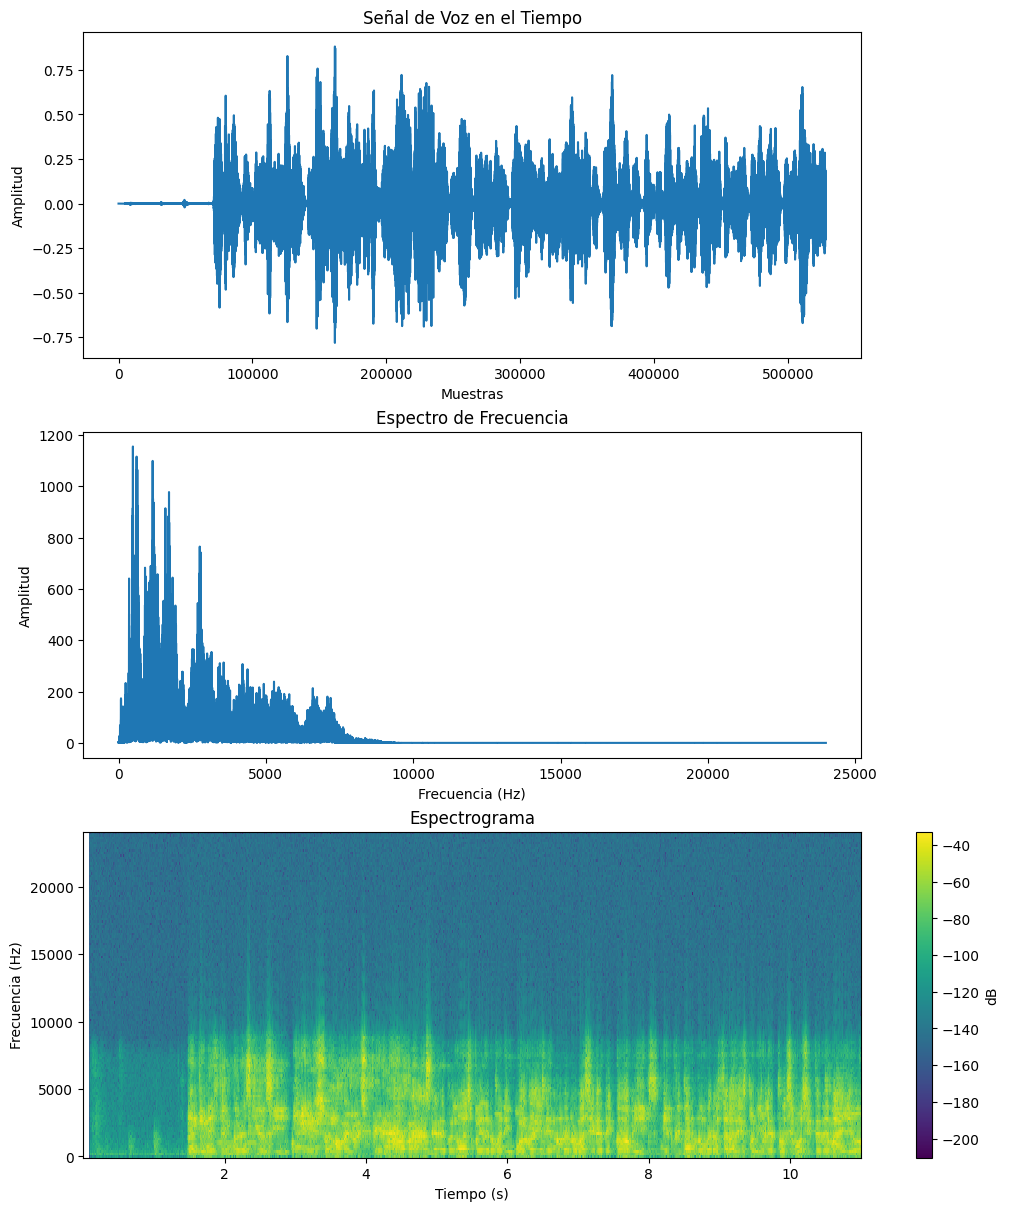

# Comparativo Contra Otro Archivo de Audio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import spectrogram
from google.colab import files
import soundfile as sf
import os

# Subir archivo de audio
uploaded = files.upload()
audio_file = list(uploaded.keys())[0]

# Leer archivo de audio con soundfile
data, RATE = sf.read(audio_file)

# Convertir a mono si es estéreo
if len(data.shape) > 1:
    data = data[:, 0]

# Configuración de la gráfica
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), constrained_layout=True)

# Dominio del tiempo
ax1.plot(data)
ax1.set_title("Señal de Voz en el Tiempo")
ax1.set_xlabel("Muestras")
ax1.set_ylabel("Amplitud")

# Transformada de Fourier
fft_result = np.abs(scipy.fftpack.fft(data))[:len(data) // 2]
freqs = np.fft.fftfreq(len(data), 1 / RATE)[:len(data) // 2]
ax2.plot(freqs, fft_result)
ax2.set_title("Espectro de Frecuencia")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud")

# Espectrograma
f, t, Sxx = spectrogram(data, RATE)
cmap = ax3.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
fig.colorbar(cmap, ax=ax3, label="dB")
ax3.set_title("Espectrograma")
ax3.set_xlabel("Tiempo (s)")
ax3.set_ylabel("Frecuencia (Hz)")

plt.show()

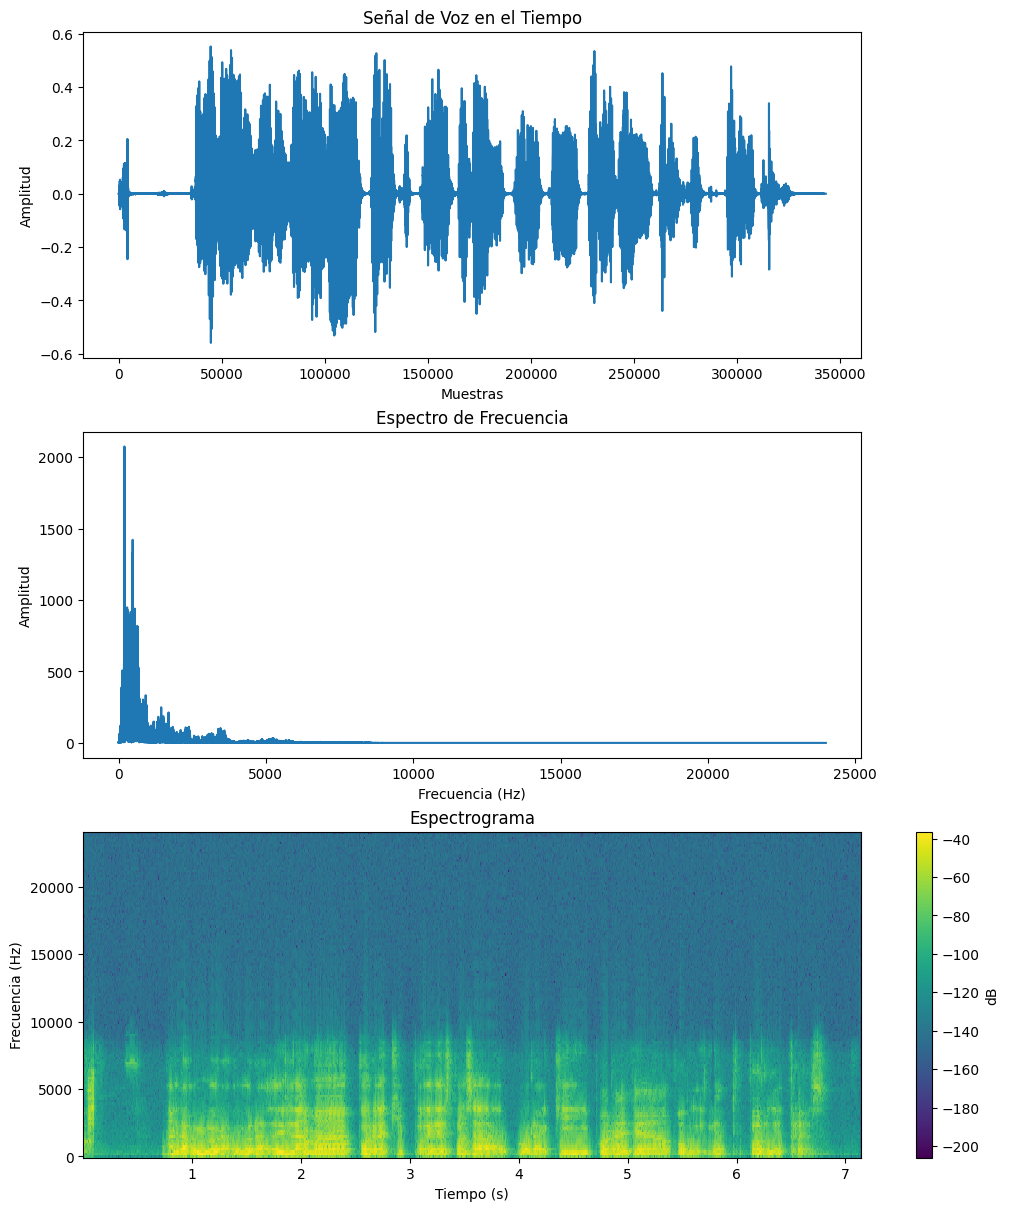

# Análisis de Resultados y Discusión
Se observa que el espectro de frecuencia varía dependiendo de la fonética de la voz capturada.
La Transformada de Fourier permite identificar picos en frecuencias específicas, que corresponden a los armónicos de la señal vocal. El espectrograma muestra cómo evolucionan estas frecuencias a lo largo del tiempo, lo cual es útil para identificar patrones en el habla.

# Conclusiones
- Se implementó con éxito un sistema de análisis de voz a partir de archivos de audio.
- La Transformada de Fourier permitió obtener información útil sobre la composición espectral de la voz.
- El espectrograma mostró variaciones de frecuencia a lo largo del tiempo, siendo una herramienta poderosa para el análisis de señales de voz.

# Referencias
- Proakis, J. G., & Manolakis, D. G. (1996). Digital Signal Processing. Pearson.
- Oppenheim, A. V., & Schafer, R. W. (2009). Discrete-Time Signal Processing. Pearson.
- Python Documentation: https://docs.python.org/3/library/